# Clustering and k-Means

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import make_blobs # import make_blobs to help us simulate some data

twoDData, cluster_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


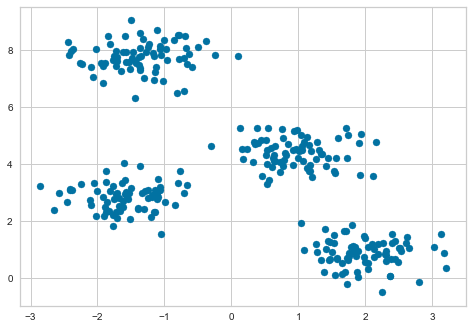

In [6]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

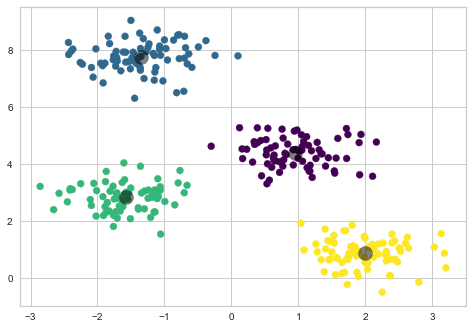

In [9]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

# Silhoutte Coefficient and Silhoutte Plot

In [10]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

In [12]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

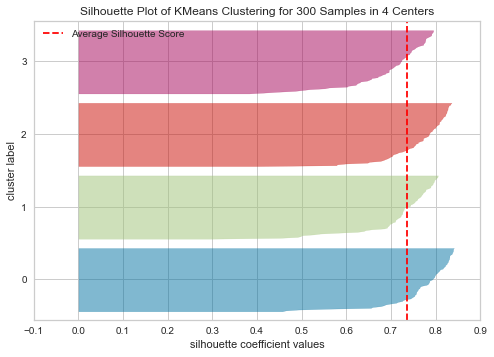

In [13]:
visualizer.fit(twoDData) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure.
## These two lines needs to be run at the same time otherwise, you won't have the labels in x,y axies.

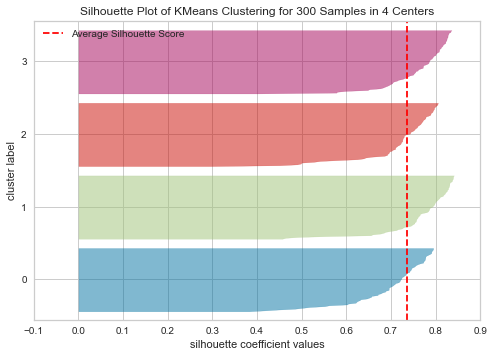

dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 


dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 




SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ecc8c9a60>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [14]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

# Clustering with k-Means: Self-Reported Motivation

In [16]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


In [17]:
motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


In [18]:
# Try 2 clusters first
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

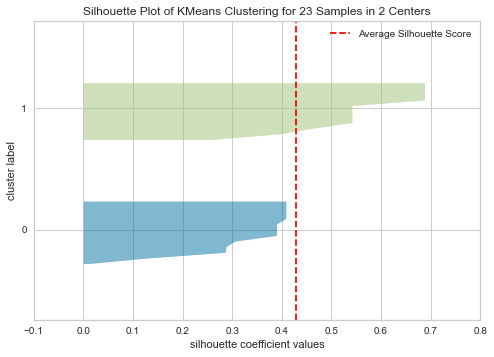

Silhouetter Score: 0.4278253443934091


In [19]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

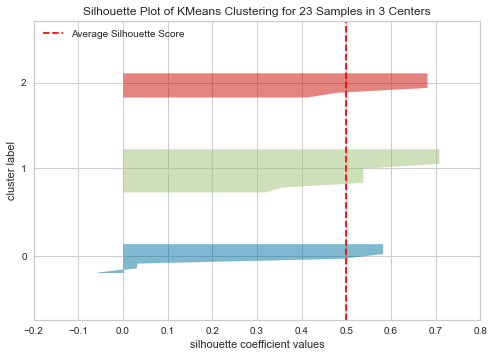

Silhouetter Score: 0.4995840033521631


In [20]:
# Try 3 clusters

motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

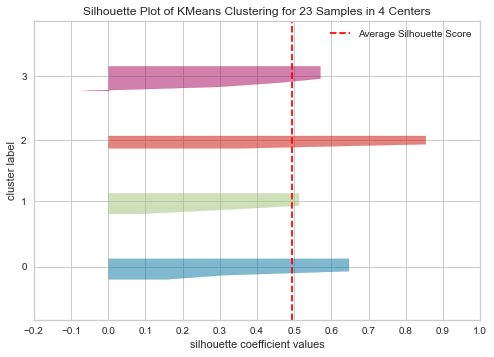

Silhouetter Score: 0.4939757511461826


In [21]:
# Try 4 clusters

motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

In [22]:
motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,2
2,1,2.0,1,2.0,2.0,0
6,2,2.0,2,2.0,2.0,2
9,2,2.0,2,2.0,2.0,2
11,2,1.0,2,1.0,2.0,0
13,2,3.0,2,3.0,1.0,2
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,0
17,1,1.0,1,1.0,1.0,0
18,1,1.0,1,1.0,1.0,0
